<a href="https://colab.research.google.com/github/inesdarosa/visualizaciones_analisis/blob/main/ancapC7_mediana_ultimas_6horas_feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import math
from keras import models, layers, optimizers, regularizers
import random
from keras.layers import Dense, Activation, Dropout
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [ ]:
C7_2022 = pd.read_csv('/content/drive/MyDrive/ejercicios_proyectos/ancap/DATACHALLENGE 2022/Desafio_Contenido_C7_Total_11-2017_09-2021.csv')
var_ind_2022 = pd.read_csv('/content/drive/MyDrive/ejercicios_proyectos/ancap/DATACHALLENGE 2022/Desafio_VariablesControl_DCH2022.csv', sep=';')


In [ ]:
C7_2022.Contenido_C7_Total = pd.to_numeric(C7_2022.Contenido_C7_Total, errors='coerce')
var_ind_2022['TimeStamp'] = pd.to_datetime(var_ind_2022['TimeStamp'])
print(C7_2022.head())
print(var_ind_2022.head())


        Fecha      Hora  Contenido_C7_Total  \
0  2017-11-13  07:55:00                1.58   
1  2017-11-14  07:00:00                0.87   
2  2017-11-16  07:00:00                1.29   
3  2017-11-17  07:00:00                1.90   
4  2017-11-19  07:00:00                0.68   

                              archivo  
0   CARGA_ISOM_CAB_2102E-2017-11.xlsx  
1   CARGA_ISOM_CAB_2102E-2017-11.xlsx  
2   CARGA_ISOM_CAB_2102E-2017-11.xlsx  
3  CARGA_ISOM_CAB_2102E-2017-11 .xlsx  
4   CARGA_ISOM_CAB_2102E-2017-11.xlsx  
            TimeStamp  tdc_phd.pi_21030  tdc_phd.pic_21034  tdc_phd.pi_21035  \
0 2017-01-01 00:00:00           0.81798            0.83386           0.90135   
1 2017-01-01 00:01:00           0.81787            0.83426           0.90164   
2 2017-01-01 00:02:00           0.81777            0.83466           0.90194   
3 2017-01-01 00:03:00           0.81767            0.83505           0.90223   
4 2017-01-01 00:04:00           0.81756            0.83545           0.90252 

In [ ]:
C7_2022['Fecha_Hora'] = pd.to_datetime(C7_2022['Fecha'] + ' ' + C7_2022['Hora'])
print(C7_2022.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               1049 non-null   object        
 1   Hora                1049 non-null   object        
 2   Contenido_C7_Total  1049 non-null   float64       
 3   archivo             1049 non-null   object        
 4   Fecha_Hora          1049 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 41.1+ KB
None


In [ ]:
var_ind_2022['indice'] = np.arange(var_ind_2022.shape[0])

dfXinterval_clean = []

for i in range(len(C7_2022)):
    mask = var_ind_2022['TimeStamp'] == C7_2022.iloc[i,4]
    ind = var_ind_2022.loc[mask]['indice']
    matriz_vars_tiempo = pd.DataFrame()
    for j in range(360):
        #print("indice>" +str(ind))
        #print("j>"+str(j))
        fila = var_ind_2022.iloc[ind-j,1:-1]
        #print(fila)
        matriz_vars_tiempo = matriz_vars_tiempo.append(fila, ignore_index = True)
    dfXinterval_clean.append(matriz_vars_tiempo)

In [ ]:
list_indep = []

for i in range(len(C7_2022)):
    mediana = dfXinterval_clean[i].describe().iloc[5,].values
    list_indep.append(mediana)


In [ ]:
list_indep[0:3]

In [ ]:
type(list_indep) 

array_indep = np.array(list_indep)

In [ ]:
array_indep.shape

(1049, 33)

In [ ]:
C7_total = C7_2022['Contenido_C7_Total']
type(C7_total)


pandas.core.series.Series

In [ ]:
C7_array = np.array(C7_total)
C7_array.shape


(1049,)

In [ ]:
C7_array = np.reshape(C7_array, (1049,1))


In [ ]:
C7_array.shape

(1049, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(array_indep, C7_array, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(y_train.shape)


(839, 33)
(839, 1)


In [ ]:
XY_scaler = MinMaxScaler()
X_data_train = XY_scaler.fit_transform(X_train)
Y_data_train = XY_scaler.fit_transform(y_train)

X_data_test = XY_scaler.fit_transform(X_test)
Y_data_test = XY_scaler.fit_transform(y_test)



In [ ]:
print(type(X_data_test))
print(Y_data_test.shape)


<class 'numpy.ndarray'>
(210, 1)


In [ ]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=33,
                       units=64, 
                       activation='relu'))


model.add(layers.Dense(input_dim=64,
                       units=32,
                       activation='relu'))
model.add(layers.Dropout(0.2))

# add the output layer
model.add(layers.Dense(input_dim=32,
                       units=1,
                       activation='linear'))

# define our loss function and optimizer
model.compile(loss='mean_squared_error',
              # Adam is a kind of gradient descent
              optimizer='adam')

#optimizers.Adam(lr=0.01)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_data_train, Y_data_train, epochs=100, batch_size=10)

Epoch 1/100
84/84 [==============================] - 1s 2ms/step - loss: 0.1096
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 10/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 11/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 12/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 13/100
84/84 [=================

In [ ]:
ypred = model.predict(X_data_test)
print("MSE: %.4f" % mean_squared_error(Y_data_test, ypred))

7/7 [==============================] - 0s 3ms/step
MSE: 0.0303


In [ ]:
ytest_orig = XY_scaler.inverse_transform(Y_data_test)
ypred_orig = XY_scaler.inverse_transform(ypred)

In [ ]:
print("MSE sin escalar: %.4f" % mean_squared_error(ytest_orig, ypred_orig))

MSE sin escalar: 1.4570


In [ ]:
# Esto hay que revisarlo
#print(sum(((ytest_orig-ypred_orig)/ypred_orig)>0.10))

In [ ]:
print(sum((ypred_orig < (ytest_orig + (10*ytest_orig/100))) & ((ytest_orig - (10*ytest_orig/100)) < ypred_orig))) 

[23]


In [ ]:
len(ytest_orig) - sum((ypred_orig < (ytest_orig + (10*ytest_orig/100))) & ((ytest_orig - (10*ytest_orig/100)) < ypred_orig))

array([187])

In [2]:
23*100/210

10.952380952380953

En el resultado anterior solo 23 casos estarían dentro del 10%, o sea que la gran mayoría de los casos los valores predichos son un 10% mayor o menor comparado con los valores reals (ytest_orig)

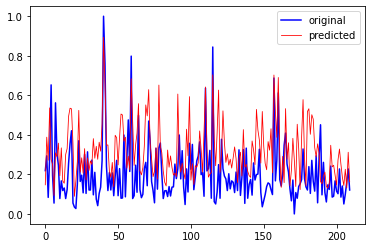

In [ ]:
x_ax = range(len(ypred))
#plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, Y_data_test, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Epoch 1/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 10/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 11/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 12/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 13/100
84/84 [=================

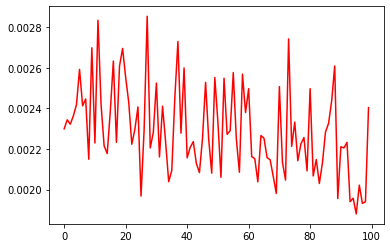

In [ ]:
history = model.fit(X_data_train, Y_data_train, epochs=100, batch_size=10)

# evaluate accuracy
train_acc = model.evaluate(X_data_train, Y_data_train, batch_size=32)
test_acc = model.evaluate(X_data_test, Y_data_test, batch_size=32)
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)


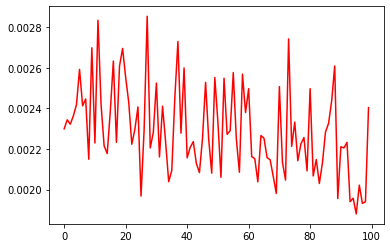

In [ ]:
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()